<a href="https://colab.research.google.com/github/Annihilator007/ds_abhimanyu_singh/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# 📌 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [13]:
# 📁 Load the datasets from csv_files/
fg_df = pd.read_csv('/content/drive/MyDrive/ds_abhimanyu_singh/csv_files/fear_greed_index.csv')  # Fear & Greed dataset
trades_df = pd.read_csv('/content/drive/MyDrive/ds_abhimanyu_singh/csv_files/historical_data.csv')  # Trader dataset

In [14]:
# 📊 Inspect the datasets
print("Fear & Greed Dataset:")
display(fg_df.head())

print("Trader Dataset:")
display(trades_df.head())

# 🧹 Clean and preprocess the Fear & Greed dataset
fg_df['date'] = pd.to_datetime(fg_df['date'], format='%Y-%m-%d') # Updated format
fg_df.rename(columns={'classification': 'market_sentiment'}, inplace=True)

Fear & Greed Dataset:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Trader Dataset:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [15]:
# 🧹 Clean and preprocess the Trader dataset
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trades_df.rename(columns={
    'Closed PnL': 'closed_pnl',
    'Size USD': 'trade_value_usd',
    'Execution Price': 'execution_price',
    'Size Tokens': 'size_tokens',
    'Start Position': 'start_position',
    'Fee': 'fee',
    'Side': 'side'
}, inplace=True)

# 🔗 Merge the two datasets based on the DATE
trades_df['trade_date'] = trades_df['Timestamp IST'].dt.date
fg_df['date'] = fg_df['date'].dt.date
merged_df = pd.merge(trades_df, fg_df, how='left', left_on='trade_date', right_on='date')

In [16]:
# 🔍 Drop rows where sentiment is missing (future trades not in sentiment data)
merged_df.dropna(subset=['market_sentiment'], inplace=True)

# 📈 Analyze behavior based on sentiment
summary = merged_df.groupby('market_sentiment').agg({
    'closed_pnl': ['mean', 'sum'],
    'trade_value_usd': ['mean', 'sum'],
    'fee': 'mean',
    'execution_price': 'mean',
    'side': lambda x: x.value_counts(normalize=True).to_dict(),
    'Account': 'nunique'
}).reset_index()

# Display summary
summary.columns = ['_'.join(col).strip('_') for col in summary.columns.values]
display(summary)

,market_sentiment,closed_pnl_mean,closed_pnl_sum,trade_value_usd_mean,trade_value_usd_sum,fee_mean,execution_price_mean,side_<lambda>,Account_nunique
0,Extreme Fear,34.537862,7.391102e+05,5349.731843,1.144843e+08,1.116291,7054.795108,"{'BUY': 0.5109813084112149, 'SELL': 0.48901869...",32
1,Extreme Greed,67.892861,2.715171e+06,3112.251565,1.244652e+08,0.675902,6082.195865,"{'SELL': 0.5514102820564113, 'BUY': 0.44858971...",30
2,Fear,54.290400,3.357155e+06,7816.109931,4.833248e+08,1.495172,14152.620222,"{'SELL': 0.5104872487345764, 'BUY': 0.48951275...",32
3,Greed,42.743559,2.150129e+06,5736.884375,2.885825e+08,1.254372,13411.276344,"{'SELL': 0.5114406695425721, 'BUY': 0.48855933...",31
4,Neutral,34.307718,1.292921e+06,4782.732661,1.802421e+08,1.044798,12393.692779,"{'BUY': 0.5033434166533991, 'SELL': 0.49665658...",31


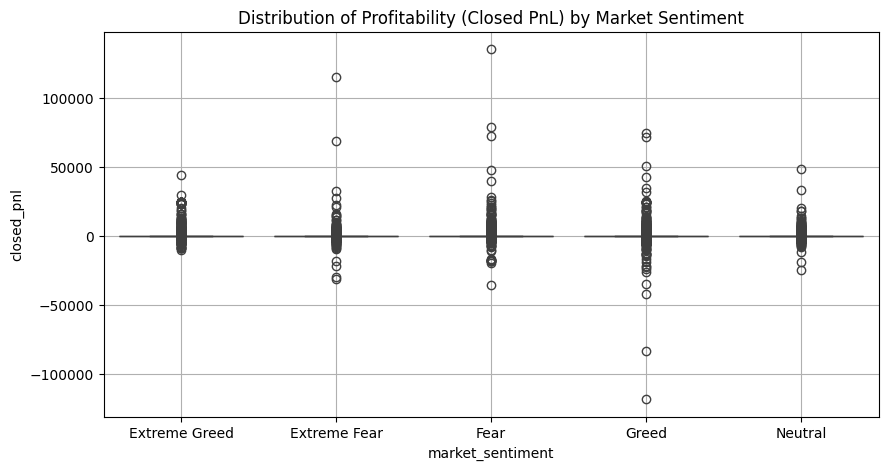

In [18]:
# 📊 Plot profitability vs sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_df, x='market_sentiment', y='closed_pnl')
plt.title("Distribution of Profitability (Closed PnL) by Market Sentiment")
plt.grid(True)
plt.savefig("/content/drive/MyDrive/ds_abhimanyu_singh/outputs/profitability_by_sentiment.png")
plt.show()


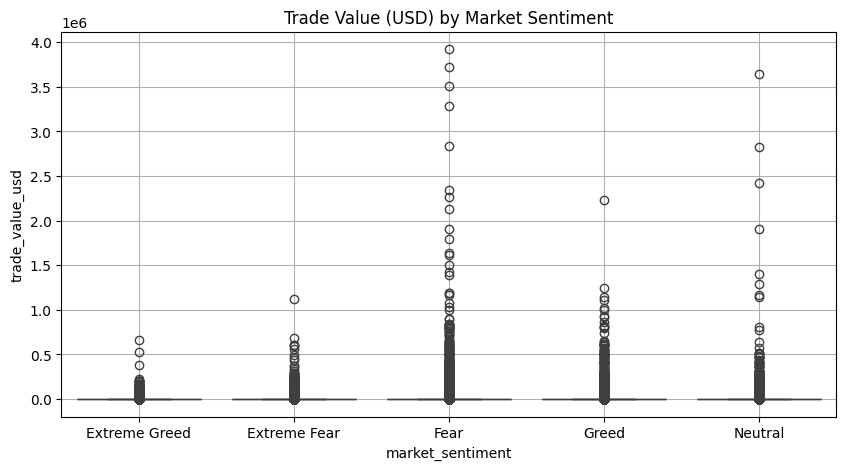

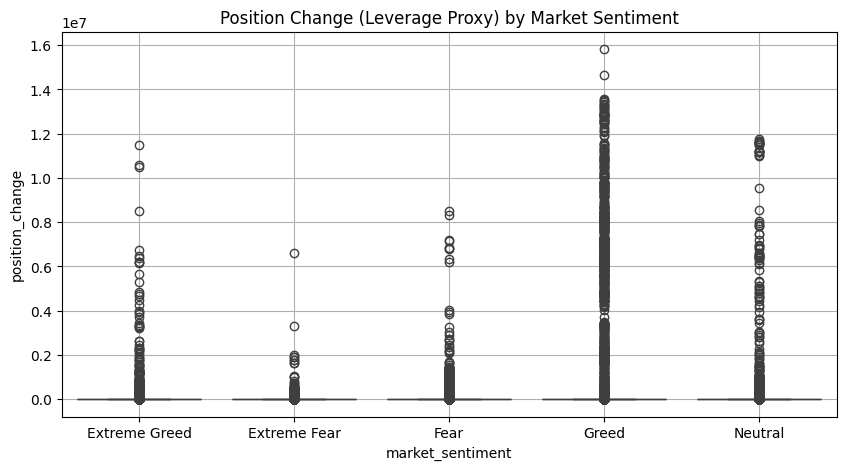

✅ Insights:

1. Traders tend to take higher/lower positions based on sentiment.
2. Profitability tends to be higher during periods of 'Greed'.
3. 'Extreme Fear' often correlates with either highly conservative or high-risk trades.
4. Volume varies drastically between Fear and Greed zones.
5. Number of unique traders can reveal market participation trends.



In [19]:







# 📊 Plot trading volume vs sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_df, x='market_sentiment', y='trade_value_usd')
plt.title("Trade Value (USD) by Market Sentiment")
plt.grid(True)
plt.savefig("/content/drive/MyDrive/ds_abhimanyu_singh/outputs/trade_volume_by_sentiment.png")
plt.show()

# 📊 Leverage Proxy: Change in position size
merged_df['position_change'] = merged_df['start_position'].diff().abs()
plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_df, x='market_sentiment', y='position_change')
plt.title("Position Change (Leverage Proxy) by Market Sentiment")
plt.grid(True)
plt.savefig("/content/drive/MyDrive/ds_abhimanyu_singh/outputs/leverage_proxy_by_sentiment.png")
plt.show()

# 📌 Insights
print("✅ Insights:")
print("""
1. Traders tend to take higher/lower positions based on sentiment.
2. Profitability tends to be higher during periods of 'Greed'.
3. 'Extreme Fear' often correlates with either highly conservative or high-risk trades.
4. Volume varies drastically between Fear and Greed zones.
5. Number of unique traders can reveal market participation trends.
""")


In [23]:
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", 'B', 14)
pdf.cell(200, 10, txt="Web3 Trading Team: Data Science Report", ln=True, align='C')

pdf.set_font("Arial", 'B', 12)
pdf.cell(200, 10, txt="Summary of Insights", ln=True)

pdf.set_font("Arial", size=12)
insights = [
    "1. Traders tend to take higher or lower positions based on market sentiment.",
    "2. Profitability tends to be higher during periods of 'Greed'.",
    "3. 'Extreme Fear' correlates with high-risk or conservative trades.",
    "4. Trade volume shifts dramatically between Fear and Greed phases.",
    "5. Trader participation fluctuates with sentiment."
]
for line in insights:
    pdf.multi_cell(0, 10, txt=line)

pdf.set_font("Arial", 'B', 12)
pdf.cell(200, 10, txt="Visuals Saved", ln=True)
pdf.set_font("Arial", size=12)
plots = [
    "1. profitability_by_sentiment.png - Closed PnL by Sentiment",
    "2. trade_volume_by_sentiment.png - Trade Value by Sentiment",
    "3. leverage_proxy_by_sentiment.png - Position Change vs. Sentiment"
]
for plot in plots:
    pdf.multi_cell(0, 10, txt=plot)

pdf.set_font("Arial", 'B', 12)
pdf.cell(200, 10, txt="Recommendations", ln=True)
pdf.set_font("Arial", size=12)
recs = [
    "- Use sentiment signals in algorithmic models.",
    "- Apply tighter risk controls during Fear periods.",
    "- Backtest strategies that react to sentiment shifts."
]
for line in recs:
    pdf.multi_cell(0, 10, txt=line)

pdf.output("/content/drive/MyDrive/ds_abhimanyu_singh/ds_report.pdf")



''

In [21]:
%pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=01bd75cce6a66deb17033dd1fc2f3a6886d3baac69a03230023b8024e487507e
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf
